# Cliping A tiff File

In [1]:
import rasterio
import rasterio.mask
import fiona
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

In [2]:
with fiona.open("../DATASETS/AusPlots_Location/AusPlots_Published_Corner_Points_20240701/Derived_Boundary_Polygons/AusPlots_Polygons_from_Published_Plots.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    shapes_name = [properties["properties"]['st_lct_'] for properties in shapefile]

In [3]:
data_file_path = 'D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_ASPECT/'
#data_file_path = 'C:/Users/krish/Desktop/Test/'
slga_datafiles = os.listdir(data_file_path) # list all datafiles 
slga_datafiles.sort()

data_file_path_2 = 'D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_TWI/'
slga_datafiles_2 = os.listdir(data_file_path_2, ) 

slga_datafiles = slga_datafiles + slga_datafiles_2

In [4]:
slga_datafiles = list(filter(lambda i: i.endswith('.tif'), slga_datafiles )) # grab only tif files 

In [5]:
column_names = [] # create user_friendly column names 
for i in slga_datafiles:
    split_words = i.split('_')[:3]
    column_names.append('_'.join(split_words))
column_names

['aspect_1s.tif', 'twi_1s.tif']

In [6]:
site_slga_data = pd.DataFrame(columns = column_names, index = shapes_name)
site_slga_data.head()

,aspect_1s.tif,twi_1s.tif
NSABBS0001,NaN,NaN
NSABBS0002,NaN,NaN
NSABBS0003,NaN,NaN
NSABBS0004,NaN,NaN
NSABBS0005,NaN,NaN


```python


for col_idx, df in enumerate(slga_datafiles):
    
    variable_mean = []
    file_path = data_file_path+df

    with rasterio.open(file_path) as src:

        for i, shape in enumerate(shapes):
            shape = [shape] # shape has to be in a list 
            shape_name = shapes_name[i] # reference the name of  the site 

            out_image, out_transform = rasterio.mask.mask(src, shape, crop=True) # perform masking 
            
            # out_meta = src.meta # update meta data of masked content 

            # out_meta.update({"driver": "GTiff",
            #              "height": out_image.shape[1],
            #              "width": out_image.shape[2],
            #              "transform": out_transform})

            image_mean = np.nanmean(out_image)
            variable_mean.append(image_mean)
        
    site_slga_data[column_names[col_idx]] = variable_mean

        #with rasterio.open(f"../DATASETS/Soils_and_Landscape_Grid_of_Australia/Output/{file_name}/{shape_name}_{file_name}.tif" , "w", **out_meta) as dest:
        #    dest.write(out_image)
```

In [7]:
data_file_path = 'D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_ASPECT/'
data_file_path_2 = 'D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_TWI/'

# aspect will be in first of the list, then DEM_TWI in the second
data_file_path_query = [data_file_path, data_file_path_2]

for col_idx, df in enumerate(slga_datafiles):
    
    variable_mean = []
    variable_cells = []
    
    file_path = data_file_path_query[col_idx] + df
    
    split_words = df.split('.')[0]
    column_name = split_words

    with rasterio.open(file_path) as src:
        print(src)

        for i, shape in enumerate(shapes):

            shape = [shape] # shape has to be in a list 
            shape_name = shapes_name[i] # reference the name of  the site 
            #print(shape_name)

            out_image, out_transform = rasterio.mask.mask(src, shape, all_touched = True, crop=True, nodata = -999999) # perform masking
            
            shape = len(out_image.ravel())
            #print(shape)
            out_image_filter = out_image[out_image != -999999]
            image_mean = np.nanmean(out_image_filter)       
            variable_mean.append(image_mean)
            variable_cells.append(shape)
        
    site_slga_data[column_name] = variable_mean
    site_slga_data[column_name + 'shape'] = variable_cells

<open DatasetReader name='D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_ASPECT/aspect_1s.tif' mode='r'>
<open DatasetReader name='D:/Krish_New/Dynamic_Vegetation_Project_Storage/DEM_TWI/twi_1s.tif' mode='r'>


In [8]:
site_slga_data

,aspect_1s.tif,twi_1s.tif,aspect_1s,aspect_1sshape,twi_1s,twi_1sshape
NSABBS0001,NaN,NaN,61.309254,16,8.575764,16
NSABBS0002,NaN,NaN,117.235062,20,6.360751,20
NSABBS0003,NaN,NaN,300.012665,20,11.379467,20
NSABBS0004,NaN,NaN,262.087036,25,10.131593,25
NSABBS0005,NaN,NaN,320.962585,25,11.438752,25
...,...,...,...,...,...,...
WAGCOO0001,NaN,NaN,157.325272,20,9.861727,20
WAGCOO0002,NaN,NaN,178.694977,20,8.148798,20
WAGCOO0004,NaN,NaN,148.714447,20,12.975019,20
QDASEQ0001,NaN,NaN,75.869736,20,7.233454,20


In [9]:
site_slga_data = site_slga_data[['aspect_1s', 'aspect_1sshape', 'twi_1s', 'twi_1sshape']]

In [10]:
site_slga_data.to_csv('../DATASETS/DEM_Data/DEM_Aspect_TWI.csv')

In [11]:
site_slga_data = pd.read_csv('../DATASETS/DEM_Data/DEM_Aspect_TWI.csv', index_col = 0)
site_slga_data.head()

,aspect_1s,aspect_1sshape,twi_1s,twi_1sshape
NSABBS0001,61.309254,16,8.575764,16
NSABBS0002,117.235060,20,6.360751,20
NSABBS0003,300.012660,20,11.379467,20
NSABBS0004,262.087040,25,10.131593,25
NSABBS0005,320.962600,25,11.438752,25


In [12]:
site_slga_data.describe()

,aspect_1s,aspect_1sshape,twi_1s,twi_1sshape
count,735.000000,735.000000,735.000000,735.000000
mean,178.307084,20.434014,10.023344,20.434014
std,75.757279,4.117575,1.925397,4.117575
min,14.845807,16.000000,4.832601,16.000000
25%,119.709442,20.000000,8.732249,20.000000
50%,177.714080,20.000000,9.993845,20.000000
75%,240.766395,20.000000,11.193485,20.000000
max,335.403200,49.000000,16.591906,49.000000


In [13]:
site_slga_data.iloc[np.argmax(site_slga_data['aspect_1sshape'])]

aspect_1s         74.504880
aspect_1sshape    49.000000
twi_1s            11.092671
twi_1sshape       49.000000
Name: NTASSD0009, dtype: float64

<Axes: ylabel='Frequency'>

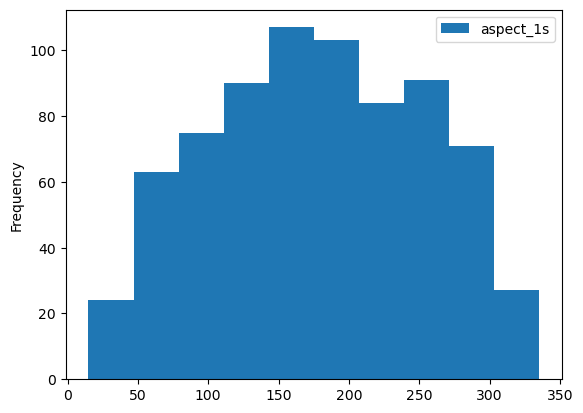

In [14]:
site_slga_data.plot(y = 'aspect_1s', kind = 'hist')

In [15]:
super_groups_classified = pd.read_csv('C:/Users/krish/Desktop/DYNAMIC MODEL VEGETATION PROJECT/au_dyanamic_vegetation_project/DATASETS/AusPlots_Extracted_Data/Final/sites_super_classified.csv')
super_groups_classified

,site_location_name,super_code,super_group
0,NSABBS0001,8.0,Temp/Med Tree.Palm
1,NSABBS0002,7.0,Temp/Med Shrub
2,NSABBS0003,10.0,Tropical/Savanna Tree.Palm
3,NSABBS0004,10.0,Tropical/Savanna Tree.Palm
4,NSABBS0005,10.0,Tropical/Savanna Tree.Palm
...,...,...,...
730,WAGCOO0001,5.0,Desert Tree.Palm
731,WAGCOO0002,3.0,Desert Hummock.grass
732,WAGCOO0004,1.0,Desert Chenopod
733,QDASEQ0001,8.0,Temp/Med Tree.Palm


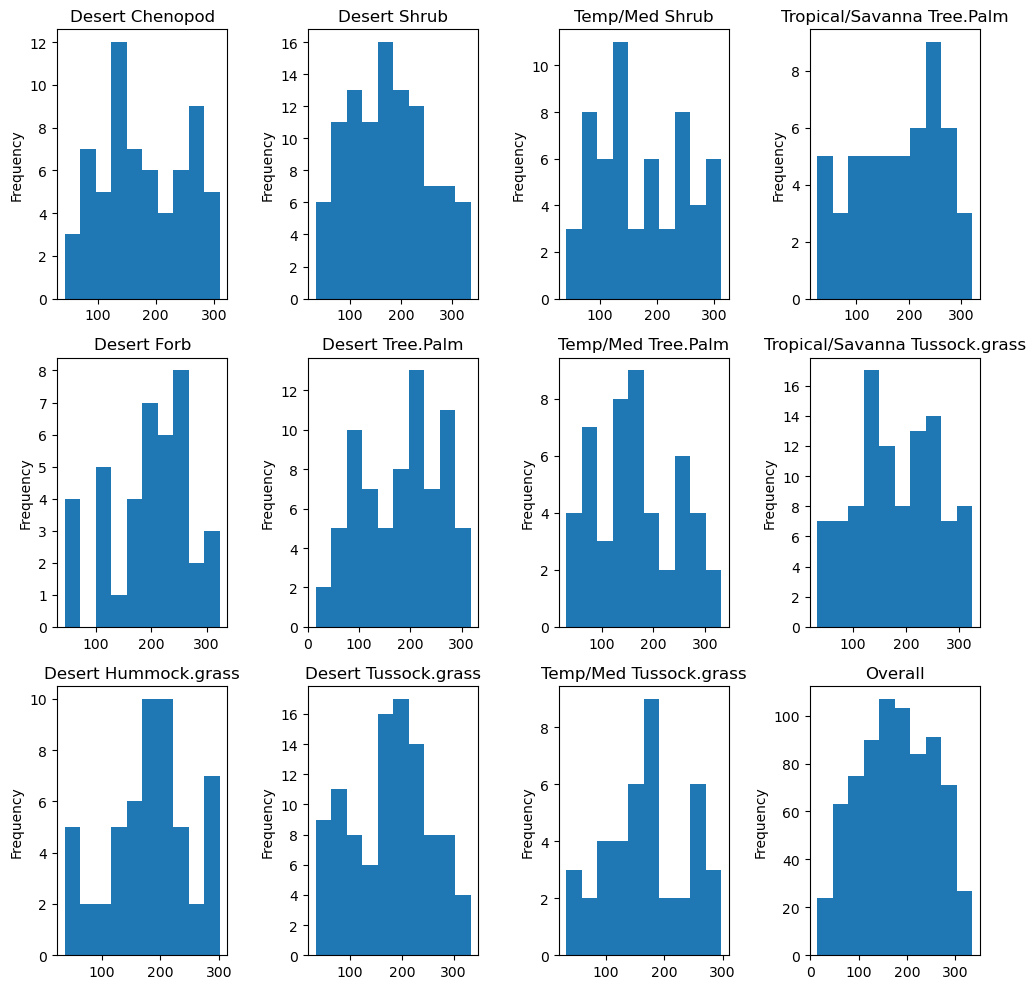

In [16]:
fig, ax = plt.subplots(3,4, figsize = (10,10))

r = 0
c = 0
for i in np.unique(super_groups_classified['super_group']):
    
    site_group_list = super_groups_classified[super_groups_classified['super_group'] == i]['site_location_name']
    selected_site = site_slga_data[site_slga_data.index.isin(site_group_list)]
    #print(selected_site)
    selected_site['aspect_1s'].plot(kind = 'hist', ax = ax[r][c])
    ax[r][c].title.set_text(f'{i}')
    
    r += 1
    if r == 3:
        r = 0
        c += 1
        

site_slga_data['aspect_1s'].plot(kind = 'hist', ax = ax[r][c])
ax[r][c].title.set_text(f'Overall')
    
plt.tight_layout()

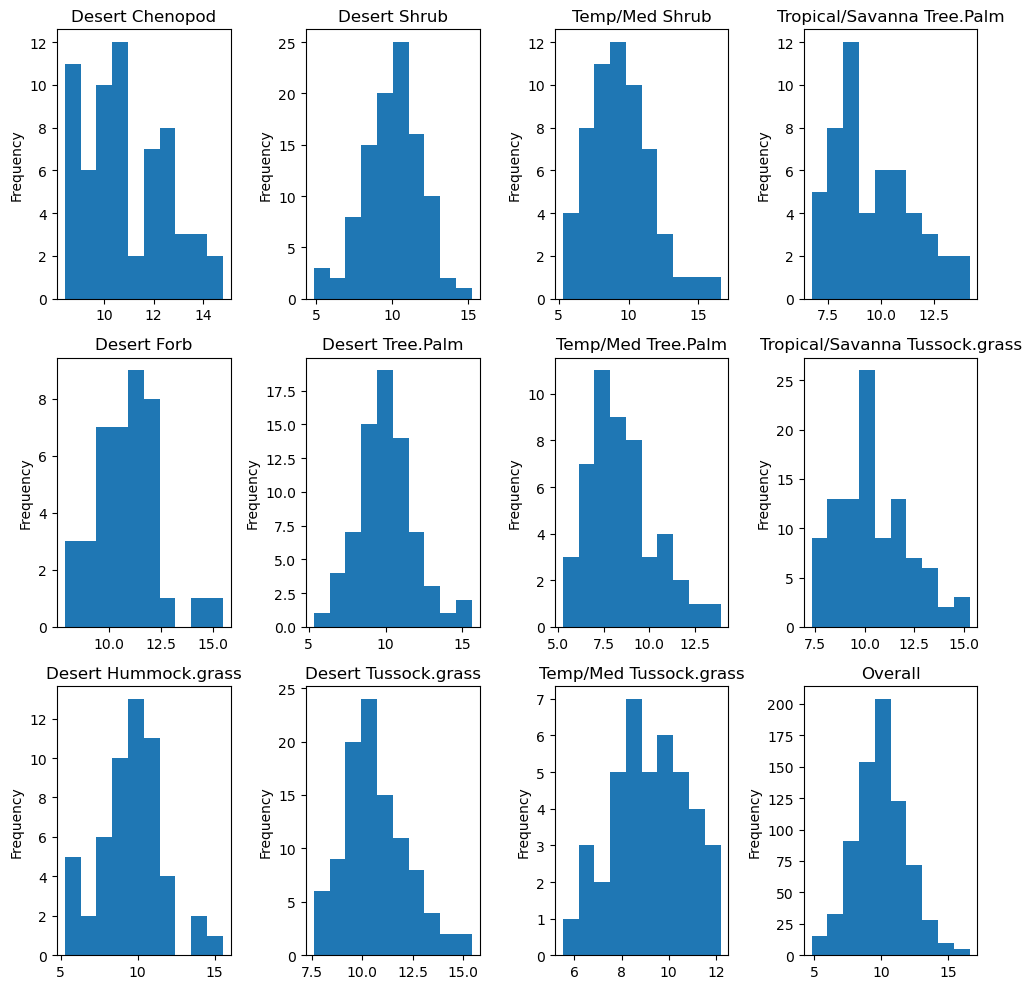

In [17]:
fig, ax = plt.subplots(3,4, figsize = (10,10))

r = 0
c = 0
for i in np.unique(super_groups_classified['super_group']):
    
    site_group_list = super_groups_classified[super_groups_classified['super_group'] == i]['site_location_name']
    selected_site = site_slga_data[site_slga_data.index.isin(site_group_list)]
    #print(selected_site)
    selected_site['twi_1s'].plot(kind = 'hist', ax = ax[r][c])
    ax[r][c].title.set_text(f'{i}')
    
    r += 1
    if r == 3:
        r = 0
        c += 1
        

site_slga_data['twi_1s'].plot(kind = 'hist', ax = ax[r][c])
ax[r][c].title.set_text(f'Overall')
    
plt.tight_layout()

In [19]:
site_slga_data.iloc[site_slga_data.index == 'WAGCOO0004']

,aspect_1s,aspect_1sshape,twi_1s,twi_1sshape
WAGCOO0004,148.71445,20,12.975018,20
